In [11]:

import geopandas as gpd


In [12]:
df = gpd.read_file("../../Outputs/data/complete_output_lagged_V3.gpkg")

In [22]:
df.columns

Index(['INSEE_COM', 'NOM_COMM', 'NOM_DEPT', 'NOM_REGION', 'Po_chien13',
       'Po_chien14', 'Po_chien15', 'Po_chien16', 'Po_chien17', 'Po_chien18',
       'Po_chien19', 'Po_chien20', 'nan_count_', 'TRUE_NAN',
       'typologie_normative', 'X_CHF_LIEU', 'Y_CHF_LIEU', 'Z_MOYEN',
       'SUPERFICIE', 'Pop_huma13', 'Pop_huma14', 'Pop_huma15', 'Pop_huma16',
       'Pop_huma17', 'Pop_huma18', 'Pop_huma19', 'Pop_huma20',
       'ratio_exact_13', 'ratio_exact_14', 'ratio_exact_15', 'ratio_exact_16',
       'ratio_exact_17', 'ratio_exact_18', 'ratio_exact_19', 'ratio_exact_20',
       'Lower_Bound', 'Upper_Bound', 'Po_chien_history_growth', 'ratio_source',
       'ratio_for_calc', 'ratio_lag_final', 'ratio_consolidated',
       'chiens_final_total',
       'Part des maisons dans le total des logements 2022',
       'Nb de familles 2022', 'part_famille_2plus', '_merge',
       'Part_des_surfaces_artificialisées_2018',
       'Part des ménages dont la famille principale est formée d'un couple av

In [13]:
df

,INSEE_COM,NOM_COMM,NOM_DEPT,NOM_REGION,Po_chien13,Po_chien14,Po_chien15,Po_chien16,Po_chien17,Po_chien18,...,_merge,Part_des_surfaces_artificialisées_2018,Part des ménages dont la famille principale est formée d'un couple avec enfant(s) 2022,Médiane du revenu disponible par UC 2021,Taille moyenne des ménages 2022,Typologie diversité des ruralités (Commune),has_shelter,SUPERFICIE_calc,densite_pop,geometry
0,65013,ANSOST,HAUTES-PYRENEES,MIDI-PYRENEES,NaN,NaN,NaN,NaN,NaN,16.0,...,both,0,47.6,N/A - résultat non disponible,2.6,3.0,False,2.24,25.45,"MULTIPOLYGON (((465243.49 6264358.451, 466009...."
1,30152,LES MAGES,GARD,LANGUEDOC-ROUSSILLON,551.0,614.0,621.0,584.0,649.0,650.0,...,both,14.4,27.3,20930,2.2,6.0,True,12.78,162.28,"MULTIPOLYGON (((792371.141 6350686.775, 792734..."
2,61294,MORTREE,ORNE,BASSE-NORMANDIE,NaN,NaN,NaN,NaN,NaN,NaN,...,both,2.3,26.7,21780,2.1,3.0,False,23.83,49.31,"MULTIPOLYGON (((481878.28 6838858.477, 482005...."
3,47044,CAHUZAC,LOT-ET-GARONNE,AQUITAINE,NaN,NaN,159.0,NaN,NaN,NaN,...,both,3.4,12.9,22610,2,4.0,False,8.01,38.33,"MULTIPOLYGON (((508346.32 6399987.681, 508474...."
4,47272,SAINT-QUENTIN-DU-DROPT,LOT-ET-GARONNE,AQUITAINE,88.0,80.0,74.0,74.0,62.0,62.0,...,both,0,22.2,22220,2,1.0,False,11.93,16.35,"MULTIPOLYGON (((510563.009 6399202.252, 510333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36589,69385,LYON--5E--ARRONDISSEMENT,RHONE,RHONE-ALPES,NaN,NaN,NaN,NaN,NaN,NaN,...,left_only,None,None,None,None,NaN,False,6.17,NaN,"MULTIPOLYGON (((838192.719 6517952.391, 837734..."
36590,69386,LYON--6E--ARRONDISSEMENT,RHONE,RHONE-ALPES,NaN,NaN,NaN,NaN,NaN,NaN,...,left_only,None,None,None,None,NaN,True,3.74,NaN,"MULTIPOLYGON (((842959.875 6520980.814, 843197..."
36591,69387,LYON--7E--ARRONDISSEMENT,RHONE,RHONE-ALPES,NaN,NaN,NaN,NaN,NaN,NaN,...,left_only,None,None,None,None,NaN,True,9.56,NaN,"MULTIPOLYGON (((843803.052 6514928.792, 842919..."
36592,69388,LYON--8E--ARRONDISSEMENT,RHONE,RHONE-ALPES,NaN,NaN,NaN,NaN,NaN,NaN,...,left_only,None,None,None,None,NaN,True,6.62,NaN,"MULTIPOLYGON (((847122.134 6517255.367, 846733..."


In [14]:
df[['Po_chien_history_growth']].var()

Po_chien_history_growth    420202.719315
dtype: float64

In [15]:
print(df[['ratio_exact_19']].describe())

       ratio_exact_19
count    25697.000000
mean         0.302677
std          0.478341
min          0.000016
25%          0.160000
50%          0.231884
75%          0.336467
max         38.794118


In [ ]:
df.columns

In [ ]:
df

# Réduire le nombre de varibales

In [18]:
gdf=df

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# --- 1. Sélection des variables ---
features = ['Pop_huma20','densite_pop','Y_CHF_LIEU', 'Z_MOYEN','ratio_lag_final','SUPERFICIE_calc']

added_features = [
    'Part des maisons dans le total des logements 2022',
    'part_famille_2plus',
    'Part_des_surfaces_artificialisées_2018',
    "Part des ménages dont la famille principale est formée d'un couple avec enfant(s) 2022",
    'Médiane du revenu disponible par UC 2021',
    'Taille moyenne des ménages 2022'
]

all_features = features + added_features

# --- 2. Préparation des données ---
df_ml = gdf.copy()

# Conversion forcée en numérique
for col in all_features + ['Po_chien_history_growth']:
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

# Nettoyage des NaNs dans la CIBLE
df_ml = df_ml.dropna(subset=['Po_chien_history_growth'])

# Remplissage des NaNs dans les FEATURES
X = df_ml[all_features].fillna(df_ml[all_features].median())
y = df_ml['Po_chien_history_growth']

# --- 3. Découpage Train / Test (LA CORRECTION) ---
# On garde 20% des données de côté pour le test final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total communes : {len(df_ml)}")
print(f"Entraînement sur : {len(X_train)} communes")
print(f"Test sur : {len(X_test)} communes (jamais vues par le modèle)")

# --- 4. Entraînement ---
rf_final = RandomForestRegressor(n_estimators=500, max_depth=25, random_state=42, n_jobs=-1)
rf_final.fit(X_train, y_train)

# --- 5. Évaluation Réaliste ---
# On prédit sur le jeu de test
y_pred_test = rf_final.predict(X_test)

# Calcul des scores
r2_train = rf_final.score(X_train, y_train) # Score "scolaire" (souvent très haut)
r2_test = r2_score(y_test, y_pred_test)     # Score "réel" (sur données inconnues)

print("-" * 30)
print(f"R² sur le Train (Mémoire) : {r2_train:.4f}")
print(f"R² sur le Test (Réel)     : {r2_test:.4f}")
print("-" * 30)

# Petit check d'importance des nouvelles variables
importances = pd.Series(rf_final.feature_importances_, index=all_features).sort_values(ascending=False)
print("\nTop 5 Variables les plus importantes :")
print(importances.head(5))

Total communes : 26409
Entraînement sur : 21127 communes
Test sur : 5282 communes (jamais vues par le modèle)
------------------------------
R² sur le Train (Mémoire) : 0.9795
R² sur le Test (Réel)     : 0.9038
------------------------------

Top 5 Variables les plus importantes :
Pop_huma20                                           0.821078
SUPERFICIE_calc                                      0.042262
ratio_lag_final                                      0.035751
Y_CHF_LIEU                                           0.028073
Part des maisons dans le total des logements 2022    0.014678
dtype: float64


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# --- 1. Sélection des variables ---
features = ['Pop_huma20', 'densite_pop', 'Y_CHF_LIEU', 'Z_MOYEN', 'ratio_lag_final', 'SUPERFICIE_calc']


all_features = features

# --- 2. Préparation des données ---
df_ml = gdf.copy()

# Conversion forcée en numérique
for col in all_features + ['Po_chien_history_growth']:
    df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

# Nettoyage des NaNs dans la CIBLE
df_ml = df_ml.dropna(subset=['Po_chien_history_growth'])

# Remplissage des NaNs dans les FEATURES
X = df_ml[all_features].fillna(df_ml[all_features].median())
y = df_ml['Po_chien_history_growth']

# --- 3. Découpage Train / Test (LA CORRECTION) ---
# On garde 20% des données de côté pour le test final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total communes : {len(df_ml)}")
print(f"Entraînement sur : {len(X_train)} communes")
print(f"Test sur : {len(X_test)} communes (jamais vues par le modèle)")

# --- 4. Entraînement ---
rf_final = RandomForestRegressor(n_estimators=500, max_depth=25, random_state=42, n_jobs=-1)
rf_final.fit(X_train, y_train)

# --- 5. Évaluation Réaliste ---
# On prédit sur le jeu de test
y_pred_test = rf_final.predict(X_test)

# Calcul des scores
r2_train = rf_final.score(X_train, y_train)  # Score "scolaire" (souvent très haut)
r2_test = r2_score(y_test, y_pred_test)  # Score "réel" (sur données inconnues)

print("-" * 30)
print(f"R² sur le Train (Mémoire) : {r2_train:.4f}")
print(f"R² sur le Test (Réel)     : {r2_test:.4f}")
print("-" * 30)

# Petit check d'importance des nouvelles variables
importances = pd.Series(rf_final.feature_importances_, index=all_features).sort_values(ascending=False)
print("\nTop 5 Variables les plus importantes :")
print(importances.head(5))

Total communes : 26409
Entraînement sur : 21127 communes
Test sur : 5282 communes (jamais vues par le modèle)
------------------------------
R² sur le Train (Mémoire) : 0.9796
R² sur le Test (Réel)     : 0.9027
------------------------------

Top 5 Variables les plus importantes :
Pop_huma20         0.829491
SUPERFICIE_calc    0.051252
ratio_lag_final    0.045933
Y_CHF_LIEU         0.039109
Z_MOYEN            0.019297
dtype: float64


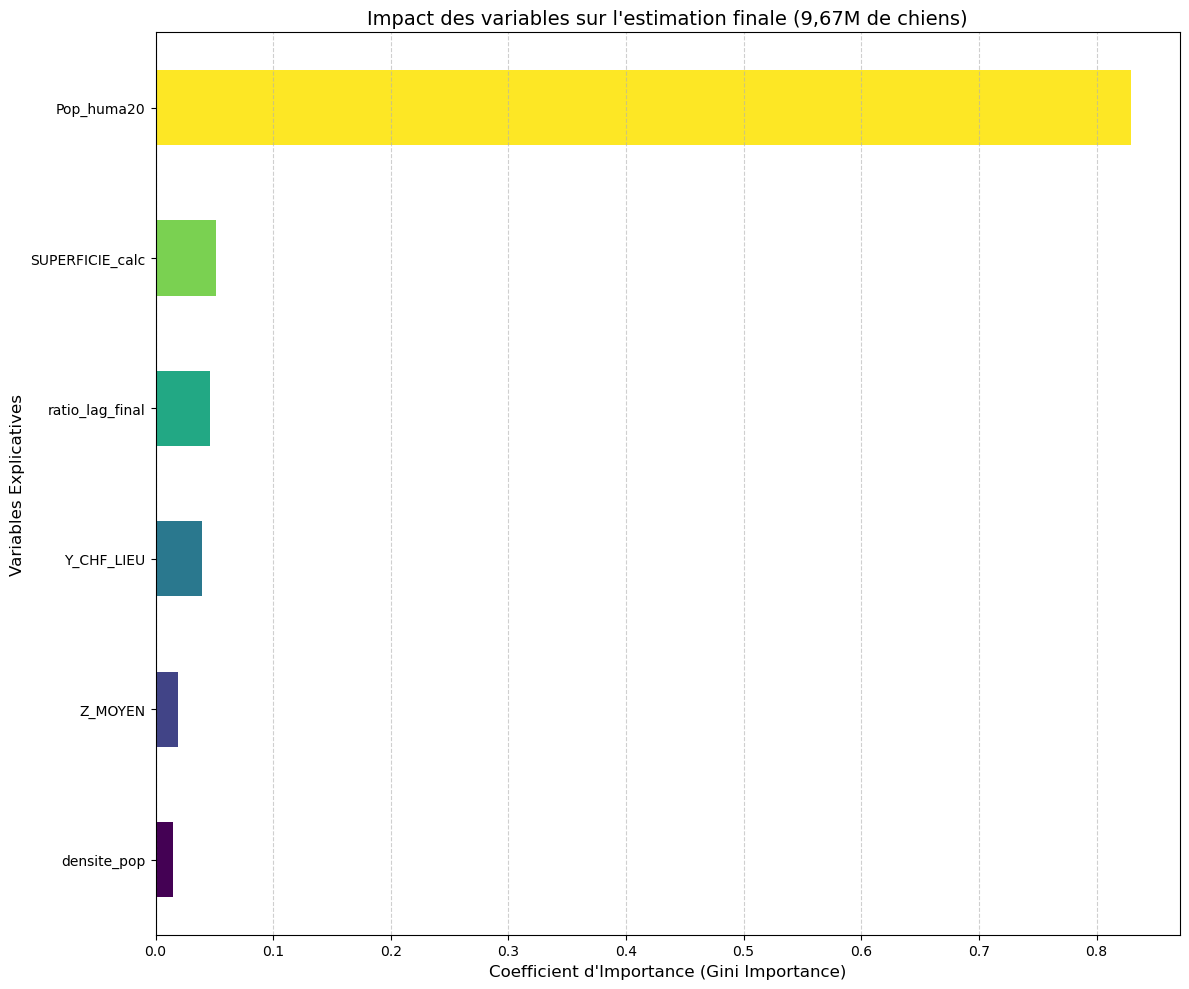

Score de robustesse du modèle (R²) : 0.9633


In [21]:
# --- 4. Analyse et Visualisation ---
import pandas as pd
# Calcul de l'importance
importances = pd.Series(rf_final.feature_importances_, index=features).sort_values(ascending=True)

# Graphique
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
importances.plot(kind='barh', color=colors)

plt.title("Impact des variables sur l'estimation finale (9,67M de chiens)", fontsize=14)
plt.xlabel("Coefficient d'Importance (Gini Importance)", fontsize=12)
plt.ylabel("Variables Explicatives", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print(f"Score de robustesse du modèle (R²) : {rf_final.score(X, y):.4f}")


In [10]:
# Prédiction sur l'ensemble des données préparées (X)
df_ml['chiens_predits_RF'] = rf_final.predict(X)

# On réintègre ces résultats dans le GeoDataFrame principal (gdf)
# On utilise join pour aligner via l'index
gdf = gdf.join(df_ml[['chiens_predits_RF']], how='left')

import joblib


# Sauvegarde du modèle
joblib.dump(rf_final ,"../../Outputs/modele/rf_model_imputed_temporal_large.joblib")

#print(f"Modèle sauvegardé avec succès : {model_filename}")